# Intro
We'll be analyzing the Student Performance dataset and using linear regression to make predictions on various features to predict a student's performance index.

The full report is presented alongside the code, including visualization, summaries and takeaways

## Import the required libraries


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_colwidth', 20)

## Importing the Dataset


In [3]:
data = pd.read_csv('./Student_Performance.csv')

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# 1. About the Data + Cleaning
We have 6 columns
- `Hours Studied`: The total number of hours spent studying by each student.
- `Previous Scores`: The scores obtained by students in previous tests.
- `Extracurricular Activities`: Whether the student participates in extracurricular activities (Yes or No).
- `Sleep Hours`: The average number of hours of sleep the student had per day.
- `Sample Question Papers Practiced`: The number of sample question papers the student practiced.
- `Performance Index` (Target): A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


The `Extracurricular Activities` is an object column, with the values being `Yes` or `No`, we could easily apply binary encoding, 1: `Yes`, 0: `No`.

In [7]:
data["Extracurricular Activities"] = (data["Extracurricular Activities"] == "Yes").astype(int)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


## EDA (Mini EDA)
Let's take a look at our data

In [9]:
data.shape

(10000, 6)

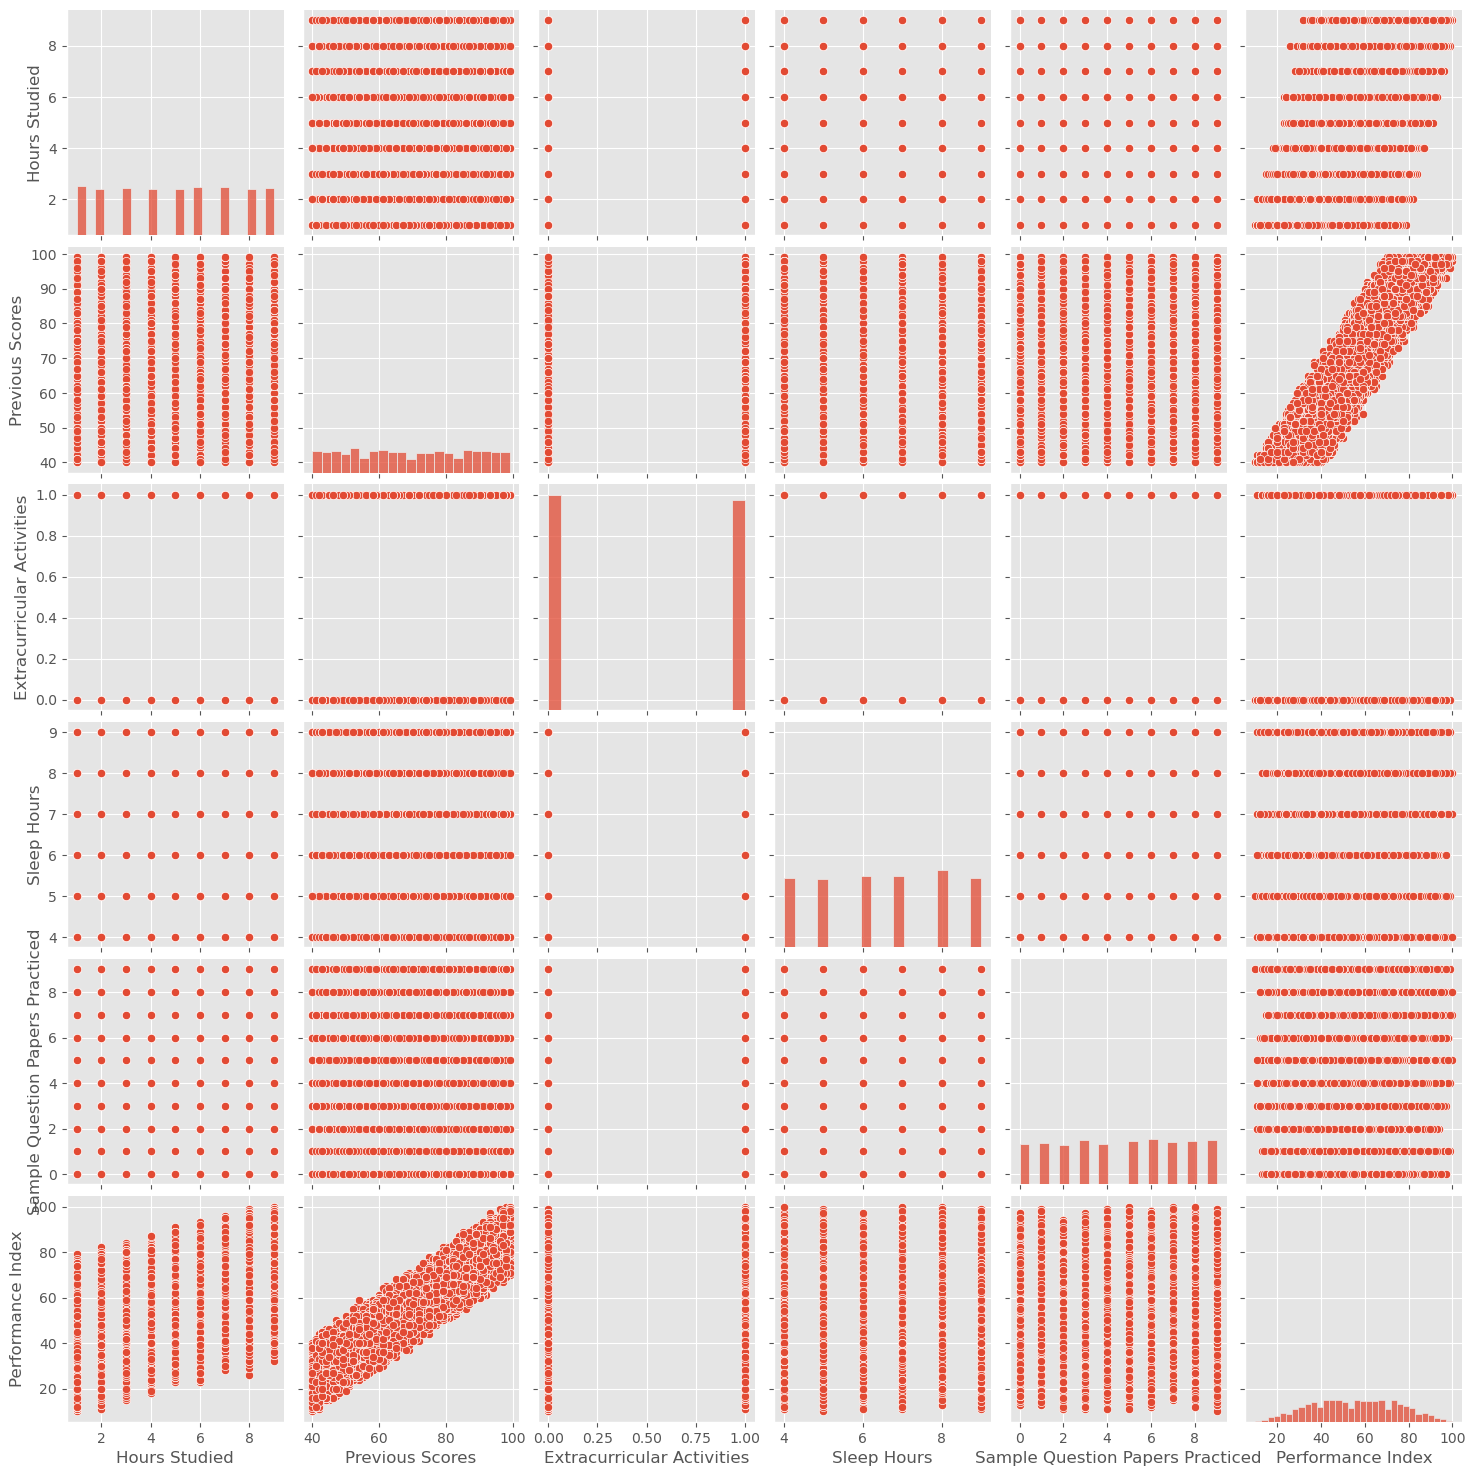

In [10]:
sns.pairplot(data)

/var/folders/hc/kstfp85j47ldl6qsl8vyt4j40000gn/T/ipykernel_33956/573977554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Performance Index"])


<Axes: xlabel='Performance Index', ylabel='Density'>

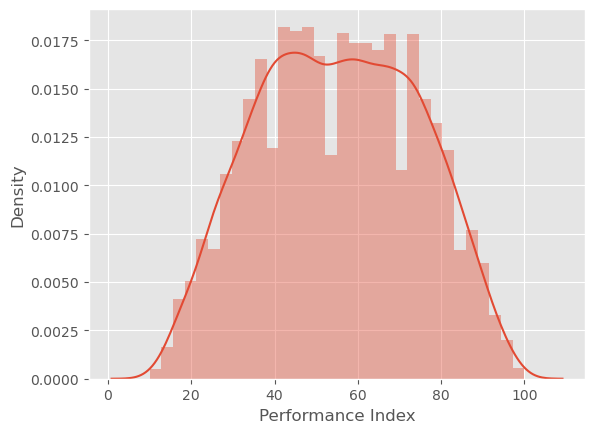

In [11]:
sns.distplot(data["Performance Index"])

Pretty good distribution.

We can start by checking our data for outliners

<Axes: >

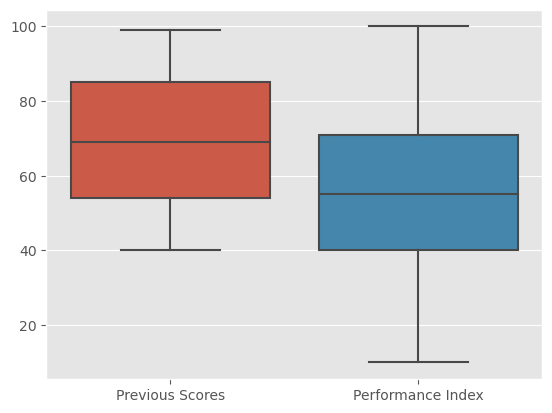

In [12]:
sns.boxplot(data=data[["Previous Scores", "Performance Index"]])

<Axes: >

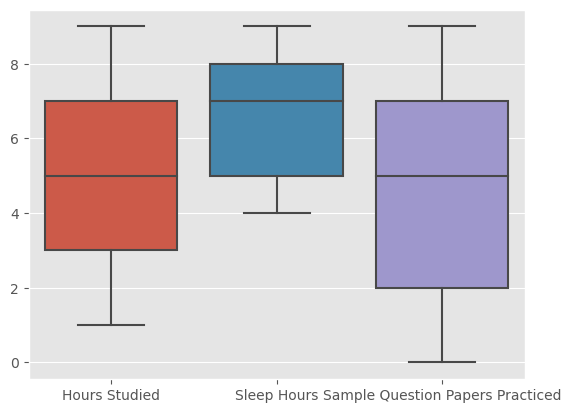

In [13]:
sns.boxplot(data=data[["Hours Studied", "Sleep Hours", "Sample Question Papers Practiced"]])

<Axes: >

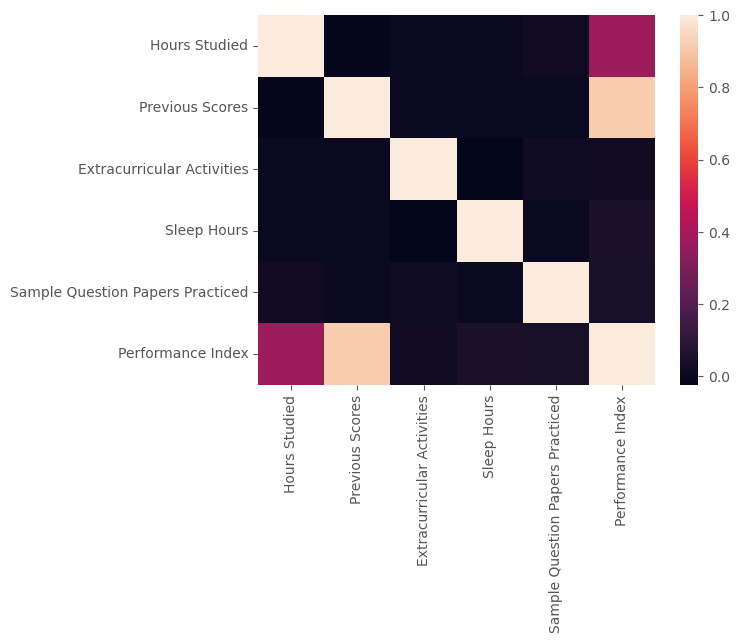

In [14]:
sns.heatmap(data.corr())

Let's box plot the `Performance Index` vs `Hours Studied` and `Previous Scores` (See heatmap), we'll also take a look at `Sample Question Papers Practiced`
These can also be plotted as a lineplot, following on each

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

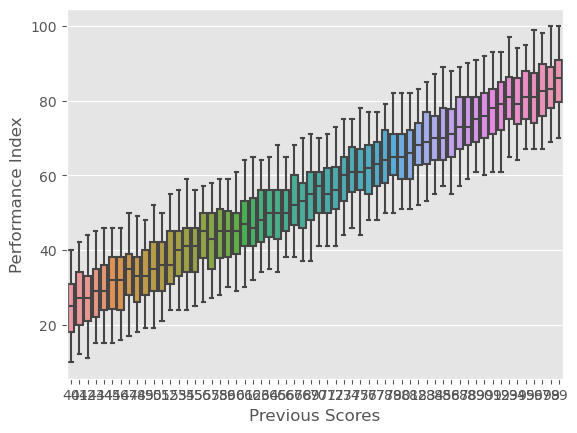

In [15]:
sns.boxplot(data=data, x="Previous Scores", y="Performance Index")

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

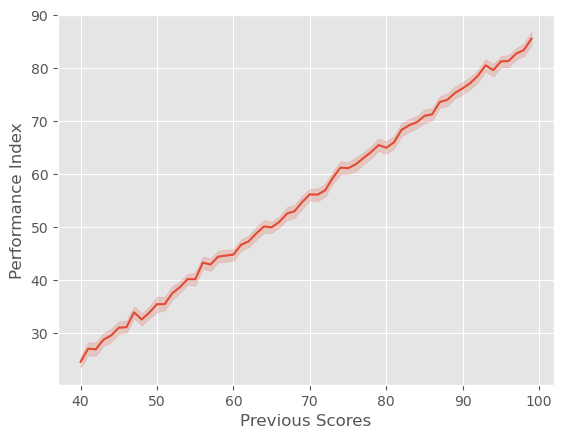

In [16]:
sns.lineplot(data=data, x="Previous Scores", y="Performance Index")

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

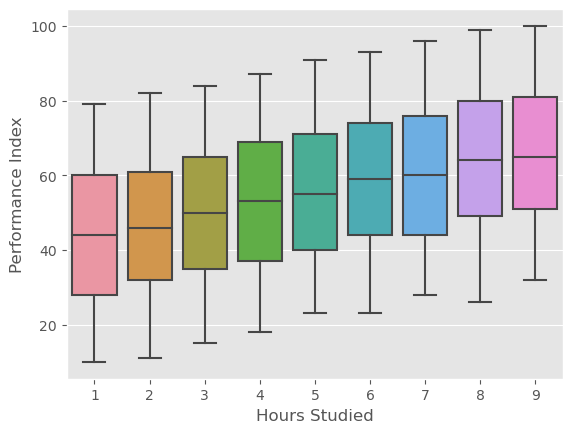

In [17]:
sns.boxplot(data=data, x="Hours Studied", y="Performance Index")

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

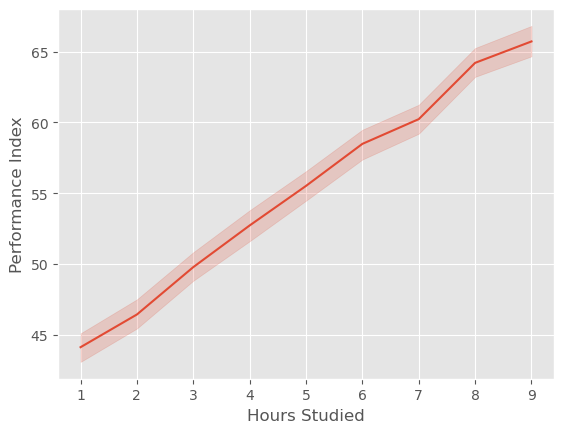

In [18]:
sns.lineplot(data=data, x="Hours Studied", y="Performance Index")

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

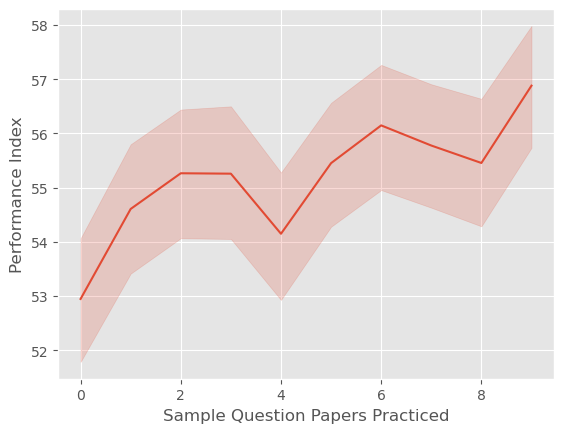

In [19]:
sns.lineplot(data=data, x="Sample Question Papers Practiced", y="Performance Index")

## Summary
We can see some clear correlations, our data is very clean as is and doesn't require any other modifications than binary encoding the `Extracurricular Activities` feature.
With that said, we're ready to continue.

Based on these findings we can make a few hypotheses but we'll jump straight into modeling.

# 3. Linear Regression Models
We'll create 3 models, all of which are linear/polynomial.

1. Simple Linear Regression
2. Polynomial Linear Regression
3. Regularized Linear Regression

Training will be done using the same train-test split and will be scored used `r2_score` and `root_mean_squared_error`

Note: we don't need to perform any scaling!


In [31]:
y = data['Performance Index']
X = data.drop(['Performance Index'], axis = 1)
print(X.columns)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 42)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')


In [21]:
# Since we're repeating the error checking, we'll just create a function for that
def train_val_score(true_val, pred_val):
    rmse = mean_squared_error(true_val, pred_val, squared=False)
    r2_lr = r2_score(true_val, pred_val)
    print(f"RMSE: {rmse}\nR^2: {r2_lr}")


### Simple Linear Regression
The simplest model, we'll fit our data and calculate our errors

In [22]:
y = data['Performance Index']
X = data.drop(['Performance Index'], axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Scoring

In [23]:
print(f"Train Score: {lr.score(X_train, y_train)}")
print(f"CV Score: {lr.score(X_val, y_val)}")

Train Score: 0.9887468937857731
CV Score: 0.9887619554692855


In [24]:
y_pred = lr.predict(X_val)

In [25]:
train_val_score(y_val, y_pred)

RMSE: 2.032240626285322
R^2: 0.9887619554692855


Very good scores so far

### Polynomial Linear Regression
Now adding some polynomial features (2nd order)

In [26]:
# Create the pipeline.
pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=3, include_bias=False)), 
    ("linear_regressor", LinearRegression())
])


# Fit the pipeline to the data.
pipeline.fit(X_train, y_train)

# Make predictions.
y_pred = pipeline.predict(X_val)

In [27]:
print(f"Train Score: {pipeline.score(X_train, y_train)}")
print(f"CV Score: {pipeline.score(X_val, y_val)}")

Train Score: 0.9888093955521454
CV Score: 0.9887428722587172


In [28]:
train_val_score(y_val, y_pred)

RMSE: 2.0339653581085924
R^2: 0.9887428722587172


In [32]:
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

In [40]:
y.quantile([.1, .25, .50, .75, .95])

0.10    29.0
0.25    40.0
0.50    55.0
0.75    71.0
0.95    86.0
Name: Performance Index, dtype: float64

Almost identical to our simpler model

### Regularized Linear Regression
We could use LASSO or Ridge, or even ElasticNet.

Here we'll try all 3!

In [312]:
elastic = ElasticNet(random_state=42, alpha=0.1, selection='random')
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42, alpha=0.1)

In [313]:
elastic.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [314]:
y_pred = elastic.predict(X_val)
print(f"ElasticNet Train Score: {elastic.score(X_train, y_train)}")
print(f"Elastic CV Score: {elastic.score(X_val, y_val)}")
train_val_score(y_val, y_pred)

ElasticNet Train Score: 0.988677905517586
Elastic CV Score: 0.988625132691471
RMSE: 2.044574426317685
R^2: 0.988625132691471


In [315]:
y_pred = ridge.predict(X_val)
print(f"Ridge Train Score: {ridge.score(X_train, y_train)}")
print(f"Ridge CV Score: {ridge.score(X_val, y_val)}")
train_val_score(y_val, y_pred)

Ridge Train Score: 0.9887468936838386
Ridge CV Score: 0.9887618982135246
RMSE: 2.0322458032240154
R^2: 0.9887618982135246


In [316]:
y_pred = lasso.predict(X_val)
print(f"LASSO Train Score: {lasso.score(X_train, y_train)}")
print(f"LASSO CV Score: {lasso.score(X_val, y_val)}")
train_val_score(y_val, y_pred)

LASSO Train Score: 0.9886208700099084
LASSO CV Score: 0.9885310078678917
RMSE: 2.0530162273927703
R^2: 0.9885310078678917


#### R2 for individual features

In [317]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_val[[feature]],y_val))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

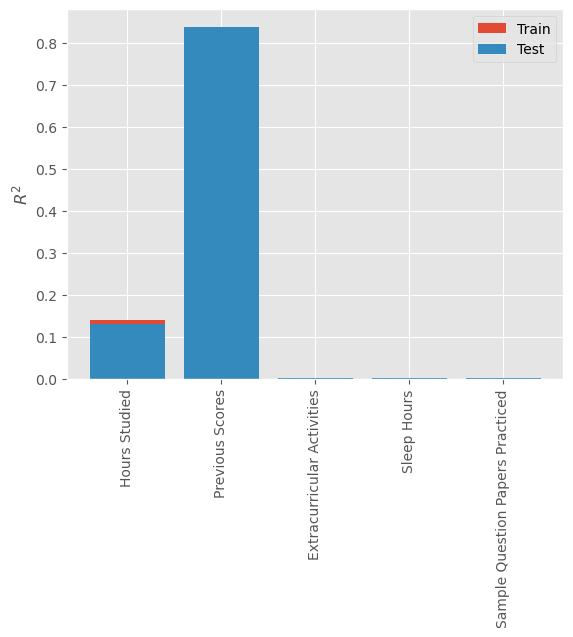

Training R^2 mean value 0.19655063788619953 Testing R^2 mean value 0.19485871244974606 
Training R^2 max value 0.8374213439513805 Testing R^2 max value 0.8383066847315146 


In [318]:
get_R2_features(lr)

# 4. Insights and key findings
Our dataset doesn't have many features and is quite clean and all of our models are almost identical in terms of RMSE and R2 score.
I've also tested higher order polynomial features which resulted in much worse and noticeable score differences, so I would recommend sticking to a simple Linear Regression model, keeping it efficient, simple and easy to understand.

From the individual feature R2 scores above we deduce that `Hours Studied` and `Previous Scores` have the highest impact on our model, this is true for all of our models!
Students with more study hours and better previous scores are more likely to perform better.

This can provide us with a somewhat accurate way to score our student's `Performance Index`.

# 5. Next Steps
We should collect a few more features so we could develop a more robust model, new features could include but are not limited to: `Scores_Per_Class`, `Age`, `State`, `Favorite Subject`, socio-economic related data and more.

This information could help us identify outliers and weak points in education, helping us formulate better solutions for struggling students.